In [106]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#분류NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
#분류KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

import warnings 
warnings.filterwarnings('ignore')

In [107]:
#1. 데이터 구성하기(1)
df_raw = pd.read_csv("../data/Big Data 분석/유방암.csv", encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [108]:
#1. 데이터 구성하기(2) - 결측치 확인
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [109]:
#1. 데이터 구성하기(3)
df_raw['diagnosis'].replace({'음성':0, '양성':1}, inplace=True)

df_raw_x = df_raw.drop("diagnosis",axis=1)
df_raw_y = df_raw["diagnosis"]

df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [110]:
#1. 데이터 구성하기(4) - 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)

print("train data size: {}".format(df_train_x.shape))
print("test data size: {}".format(df_test_x.shape))

train data size: (192, 30)
test data size: (128, 30)


In [111]:
#2. Over-Sampling: SMOTE(1) - 목표변수 빈도 확인

print(df_raw.value_counts(["diagnosis"], "\n"))
print("diagnosis=1 비율 ", df_raw.value_counts(df_raw["diagnosis"]==1)/len(df_raw))

diagnosis
0            0.6625
1            0.3375
dtype: float64
diagnosis=1 비율  diagnosis
False    0.6625
True     0.3375
dtype: float64


In [112]:
#2. Over-Sampling: SMOTE(2)

sm = SMOTE(sampling_strategy='auto')

x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)

print("Over-sampling 전:\n", df_train_y.value_counts(),"\n")
print("Over-sampling 후 Train X:\n", x_resampled.shape)
print("Over-sampling 전 Train Y:\n", y_resampled.shape,"\n")
print("Over-sampling 후 '1':\n", sum((y_resampled==1)))
print("Over-sampling 후 '0':\n", sum((y_resampled==0)),"\n")

Over-sampling 전:
 0    115
1     77
Name: diagnosis, dtype: int64 

Over-sampling 후 Train X:
 (230, 30)
Over-sampling 전 Train Y:
 (230,) 

Over-sampling 후 '1':
 115
Over-sampling 후 '0':
 115 



In [113]:
#2. Over-Sampling: SMOTE(3) - 데이터 결합

df_resampled = pd.concat([x_resampled, y_resampled], axis=1)
print(df_resampled.head())

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0       13.150         15.34           85.31      538.9          0.09384   
1       15.750         19.22          107.10      758.6          0.12430   
2       20.640         17.35          134.80     1335.0          0.09446   
3       15.710         13.93          102.00      761.7          0.09462   
4        9.667         18.49           61.49      289.1          0.08946   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.08498         0.09293              0.03483         0.1822   
1           0.23640         0.29140              0.12420         0.2375   
2           0.10760         0.15270              0.08941         0.1571   
3           0.09462         0.07135              0.05933         0.1816   
4           0.06258         0.02948              0.01514         0.2238   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0             

In [114]:
#3. 데이터 scale 변환(1)

#변수명 저장
v_feature_name = df_train_x.columns

#StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [115]:
#3. 데이터 scale 변환(2) - 데이터 분할

df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4, random_state= 1234)
print("train data X size: {}".format(df_scaled_train_x.shape))
print("test data X size: {}".format(df_scaled_test_x.shape))

train data X size: (192, 30)
test data X size: (128, 30)


# 과제 1. 인공 신경망_분류

In [116]:
#1. 모델 생성(1) - 기본: 원본 데이터 사용

nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set: {:.3f}'.format(nn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.599
Accuracy on test set: 0.758


In [117]:
#1. 모델 생성(1) - 기본: over-sampling된 데이터 사용

nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(x_resampled, y_resampled)

print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(x_resampled, y_resampled)))
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.922
Accuracy on test set: 0.859


In [118]:
#1. 모델 생성(1) - 기본: scaled 데이터 사용

nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_scaled_train_x, df_train_y)

print('Accuracy on training set: {:.3f}'.format(nn_uncustomized.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(nn_uncustomized.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set: 0.953


## 기본 옵션을 기반으로 3가지 모델을 생성했다. 원본 데이터를 활용한 모델, over-sampling된 데이터를 활용한 모델, scaled 데이터를 활용한 모델이다.

## 세 개 모델의 train accuracy와 test accuracy를 확인해 보면, 원본 데이터를 그대로 사용해 모델을 학습시키는 것보다 데이터를 sampling해서 사용하거나 데이터를 scaling 해서 모델에 적용할 때 훨씬 나은 test accuracy를 보인다. 즉, 데이터를 그대로 사용하는 것이 아닌 데이터를 sampling 및 scaling해야 하는 것을 알 수 있었다.

## 결론적으로, scaled 데이터를 활용한 모델의 test accuracy가 약 95.3%로 가장 높았기에 파라미터 조정에서 scaled 데이터를 사용한다.(df_scaled_train_x, df_train_y)

In [119]:
#1. 모델 생성(2) - hidden_layer_sizes 조정

train_accuracy = []
test_accuracy = []

para_hidden = [20*hidden for hidden in range(1,9)]
# para_hidden = [20*hidden for hidden in range(10,20)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=v_hidden, random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
#결과 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

#모델 설명력 확인
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.995,0.938
1,40,0.995,0.945
2,60,0.995,0.945
3,80,0.995,0.938
4,100,0.995,0.953
5,120,0.995,0.953
6,140,0.995,0.953
7,160,0.995,0.953


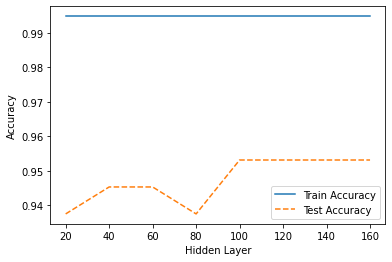

In [120]:
# 모델 정확도별 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Hidden Layer')
plt.legend();

In [121]:
#1. 모델 생성(2) - hidden_layer_sizes 지정
hidden_layer_sizes = 100

## 은닉층의 개수가 많을 수록, 즉 인공 신경망의 은닉층 구조가 복잡해질 수록 test accuracy가 높아지는 것을 볼 수 있다. 해당 과제에서는 hidden layer의 개수를 100개로 지정한다.

In [122]:
#1. 모델 생성(3) - activation 조정

train_accuracy = []
test_accuracy = []

para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(hidden_layer_sizes=100, activation=v_function, random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
#결과 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

#모델 설명력 확인
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.990,0.938
1,tanh,0.990,0.945
2,relu,0.995,0.953


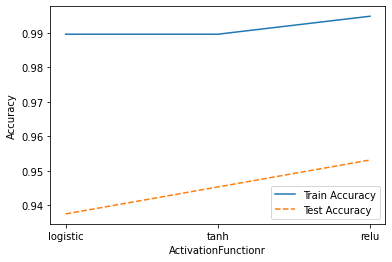

In [123]:
# 모델 정확도별 그래프 확인
plt.plot(para_function, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('ActivationFunctionr')
plt.legend();

In [124]:
#1. 모델 생성(3) - activation 지정
activation = "relu"

## 활성화 함수를 ReLU로 지정했을 때 가장 test accuracy가 좋게 나오기에 활성화 함수를 ReLU로 지정한다.

In [125]:
#1. 모델 생성(4) - solver 조정

train_accuracy = []
test_accuracy = []

para_solver = ['lbfgs', 'sgd', 'adam']

for v_solver in para_solver:
    nn = MLPClassifier(hidden_layer_sizes=100, activation='relu', solver=v_solver, random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
#결과 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

#모델 설명력 확인
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.990,0.938
1,tanh,0.990,0.945
2,relu,0.995,0.953


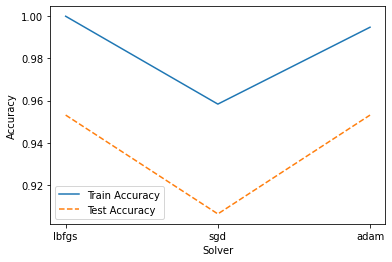

In [126]:
# 모델 정확도별 그래프 확인
plt.plot(para_solver, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_solver, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Solver')
plt.legend();

In [127]:
#1. 모델 생성(4) - solver 지정
solver = "adam"

## solver를 lbfgs와 adam으로 지정했을 때 모두 test accuracy가 높게 나오는 것을 확인했다. 하지만 lbfgs가 train data에 좀 더 과대적합하는 경향이 있어 해당 과제에서는 solver를 adam으로 지정해본다.

In [128]:
#1. 모델 생성(5) - batch_size 조정

train_accuracy = []
test_accuracy = []

para_batch = [20 * batch for batch in range(1,10)]
# para_batch = [batch for batch in range(140,170)]

for v_batch in para_batch:
    nn = MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', solver='adam',\
                       batch_size = v_batch, random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
#결과 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

#모델 설명력 확인
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,1.0,0.945
1,40,1.0,0.945
2,60,1.0,0.945
3,80,1.0,0.945
4,100,1.0,0.945
5,120,1.0,0.945
6,140,1.0,0.945
7,160,1.0,0.953
8,180,1.0,0.945


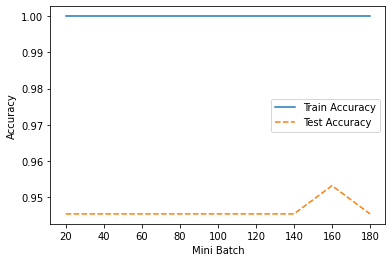

In [129]:
# 모델 정확도별 그래프 확인
plt.plot(para_batch, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_batch, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Mini Batch')
plt.legend();

In [130]:
#1. 모델 생성(5) - batch_size 지정
batch_size = 155

## batch size가 커질 수록 train data에 과대적합되는 경향이 있다. 해당 과제에서는 batch size를 155로 지정해본다.

In [131]:
#2. 최종 모델 선정

nn_final = MLPClassifier(hidden_layer_sizes=100, activation="relu", solver="adam",
                        batch_size=155, random_state=1234)
nn_final.fit(df_scaled_train_x, df_train_y)

MLPClassifier(batch_size=155, hidden_layer_sizes=100, random_state=1234)

In [132]:
#3. 최종 모델 평가

y_pred = nn_final.predict(df_scaled_test_x)
print("Accuracy on training set: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(nn_final.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 1.000
Accuracy on test set: 0.953
Confusion matrix: 
[[91  6]
 [ 0 31]]
              precision    recall  f1-score   support

           0      1.000     0.938     0.968        97
           1      0.838     1.000     0.912        31

    accuracy                          0.953       128
   macro avg      0.919     0.969     0.940       128
weighted avg      0.961     0.953     0.954       128



## 결론: 인공 신경망 모델의 accuracy는 약 95.3%이다. diagnosis가 음성인 경우, precision이 높으며 diagnosis가 양성인 경우, recall이 높다. 하지만 diagnosis가 양성인 경우 precision과 f1-score의 값이 차이를 보이고 있고 f1-score가 1에 가깝다고 보기는 어렵다. 따라서 유방암을 진단하는 데 있어 정확한 모델이라고 보기는 아쉬운 점은 있으나 이전 SVM 모델과 비교해서는 좀 더 좋은 성능을 보인다는 것을 알 수 있다.

# 과제 2. kNN 분석

In [133]:
#1. 모델 생성(1) - 기본: 원본 데이터 사용

knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(df_train_x, df_train_y)

print('Accuracy on training set: {:.3f}'.format(knn_uncusotomized.score(df_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(knn_uncusotomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.932
Accuracy on test set: 0.914


In [134]:
#1. 모델 생성(1) - 기본: over-sampling된 데이터 사용

knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(x_resampled, y_resampled)

print("Accuracy on training set: {:.3f}".format(knn_uncusotomized.score(x_resampled, y_resampled)))
print("Accuracy on test set: {:.3f}".format(knn_uncusotomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.943
Accuracy on test set: 0.898


In [135]:
#1. 모델 생성(1) - 기본: scaled 데이터 사용

knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(df_scaled_train_x, df_train_y)

print('Accuracy on training set: {:.3f}'.format(knn_uncusotomized.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(knn_uncusotomized.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.958
Accuracy on test set: 0.922


## 기본 옵션을 기반으로 3가지 모델을 생성했다. 원본 데이터를 활용한 모델, over-sampling된 데이터를 활용한 모델, scaled 데이터를 활용한 모델이다.

## 세 개 모델의 train accuracy와 test accuracy를 확인해 보면, 원본 데이터를 그대로 사용해 모델을 학습시키는 것보다 데이터를 sampling해서 사용하거나 데이터를 scaling 해서 모델에 적용할 때 훨씬 나은 test accuracy를 보인다. 즉, 데이터를 그대로 사용하는 것이 아닌 데이터를 sampling 및 scaling해야 하는 것을 알 수 있었다.

## 결론적으로, scaled 데이터를 활용한 모델의 test accuracy가 약 92.2%로 가장 높았기에 파라미터 조정에서 scaled 데이터를 사용한다.(df_scaled_train_x, df_train_y)

In [136]:
#1. 모델 생성(2) - n_neighbors 조정

train_accuracy = []
test_accuracy = []

para_n_neighbors = [neighbor for neighbor in range(3, 30)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))
    
#결과 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy

#모델 설명력 확인
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,3,0.969,0.914
1,4,0.979,0.938
2,5,0.958,0.922
3,6,0.974,0.930
4,7,0.964,0.906
5,8,0.958,0.914
6,9,0.964,0.930
7,10,0.964,0.922
8,11,0.964,0.914
9,12,0.974,0.922


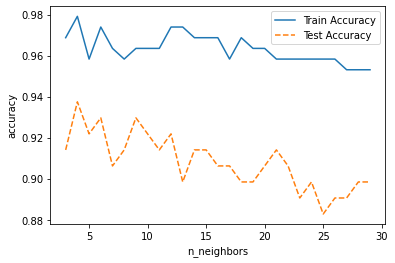

In [137]:
# 모델 정확도별 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_neighbors, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend();

In [150]:
#1. 모델 생성(2) - n_neighbors 지정
n_neighbors = 4

## 대체적으로 이웃 수가 증가할 수록 accuracy가 감소하는 것을 볼 수 있다. 해당 과제에서는 이웃 수를 4로 지정해본다.

In [139]:
#1. 모델 생성(3) - n_neighbors과 weights 함께 조정

train_accuracy = []
test_accuracy = []

para_n_neighbors = [neighbor for neighbor in range(3,30)]*2
para_weights = (['uniform'])*27+['distance']*27

for (v_n_neighbors,v_weights) in zip(para_n_neighbors,para_weights):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors,weights=v_weights)
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
#결과 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors']=para_n_neighbors
df_accuracy_weights['Weights']=para_weights
df_accuracy_weights['TrainAccuracy']=train_accuracy
df_accuracy_weights['TestAccuracy']=test_accuracy

#모델 설명력 확인
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,3,uniform,1.0,0.945
1,4,uniform,1.0,0.945
2,5,uniform,1.0,0.945
3,6,uniform,1.0,0.945
4,7,uniform,1.0,0.945
5,8,uniform,1.0,0.945
6,9,uniform,1.0,0.945
7,10,uniform,1.0,0.945
8,11,uniform,1.0,0.945
9,12,uniform,1.0,0.945


In [140]:
#그래프 생성을 위한 데이터 형태 변형
df_accuracy_weights_pivot=df_accuracy_weights.pivot(index="Neighbors",columns="Weights",
                                                    values=['TrainAccuracy','TestAccuracy'])

df_accuracy_weights_pivot

TrainAccuracy         TestAccuracy          
Weights        distance uniform     distance   uniform
Neighbors                                             
3                   1.0     1.0     0.945312  0.945312
4                   1.0     1.0     0.945312  0.945312
5                   1.0     1.0     0.945312  0.945312
6                   1.0     1.0     0.945312  0.945312
7                   1.0     1.0     0.945312  0.945312
8                   1.0     1.0     0.945312  0.945312
9                   1.0     1.0     0.945312  0.945312
10                  1.0     1.0     0.945312  0.945312
11                  1.0     1.0     0.945312  0.945312
12                  1.0     1.0     0.945312  0.945312
13                  1.0     1.0     0.945312  0.945312
14                  1.0     1.0     0.945312  0.945312
15                  1.0     1.0     0.945312  0.945312
16                  1.0     1.0     0.945312  0.945312
17                  1.0     1.0     0.945312  0.945312
18                  1.0     1.0     0.945312  0.945312
19                  1.0     1.0     0.945312  0.945312
20                  1.0     1.0     0.945312  0.945312
21                  1.0     1.0     0.945312  0.945312
22                  1.0     1.0     0.945312  0.945312
23                  1.0     1.0     0.945312  0.945312
24                  1.0     1.0     0.945312  0.945312
25                  1.0     1.0     0.945312  0.945312
26                  1.0     1.0     0.945312  0.945312
27                  1.0     1.0     0.945312  0.945312
28                  1.0     1.0     0.945312  0.945312
29                  1.0     1.0     0.945312  0.945312

In [141]:
#생성한 pivot table에서 columns와 values로 이뤄진 2개의 level을 1개의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)

df_accuracy_weights_pivot.columns=level0+"_"+level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
3,1.0,1.0,0.945312,0.945312
4,1.0,1.0,0.945312,0.945312
5,1.0,1.0,0.945312,0.945312
6,1.0,1.0,0.945312,0.945312
7,1.0,1.0,0.945312,0.945312


<AxesSubplot:xlabel='Neighbors'>

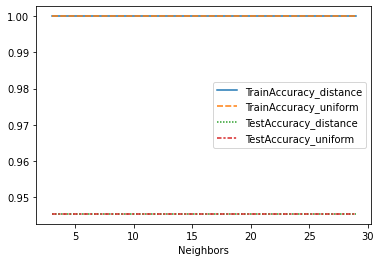

In [142]:
sns.lineplot(data=df_accuracy_weights_pivot)

In [143]:
#1. 모델 생성(3) - weights 지정
weights = 'uniform'

## 그래프를 살펴보면 어떤 가중치를 사용하든 대체로 비슷하게 나오는 것을 확인할 수 있다. 해당 과제에서는 weights를 uniform으로 사용해본다.

In [144]:
#1. 모델 생성(4) - n_neighbors과 metric 함께 조정

train_accuracy = []
test_accuracy = []

para_n_neighbors = [i for i in range(3,30)] *3
para_metric = ["minkowski"]*27 + ["euclidean"]*27 + ["manhattan"]*27

for(v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, metric=v_metric, weights="uniform")
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
#결과 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy

#모델 설명력 확인
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,3,minkowski,1.0,0.945
1,4,minkowski,1.0,0.945
2,5,minkowski,1.0,0.945
3,6,minkowski,1.0,0.945
4,7,minkowski,1.0,0.945
...,...,...,...,...
76,25,manhattan,1.0,0.945
77,26,manhattan,1.0,0.945
78,27,manhattan,1.0,0.945
79,28,manhattan,1.0,0.945


In [145]:
#그래프 생성을 위한 데이터 형태 변형
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index="Neighbors",columns="Metric",\
                                                    values=['TrainAccuracy','TestAccuracy'])

df_accuracy_weights_pivot

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
3,1.0,1.0,0.945312,0.945312
4,1.0,1.0,0.945312,0.945312
5,1.0,1.0,0.945312,0.945312
6,1.0,1.0,0.945312,0.945312
7,1.0,1.0,0.945312,0.945312
8,1.0,1.0,0.945312,0.945312
9,1.0,1.0,0.945312,0.945312
10,1.0,1.0,0.945312,0.945312
11,1.0,1.0,0.945312,0.945312


In [146]:
#생성한 pivot table에서 columns와 values로 이뤄진 2개의 level을 1개의 level로 변환
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)

df_accuracy_metric_pivot.columns=level0+"_"+level1
df_accuracy_metric_pivot.head()

,TrainAccuracy_euclidean,TrainAccuracy_manhattan,TrainAccuracy_minkowski,TestAccuracy_euclidean,TestAccuracy_manhattan,TestAccuracy_minkowski
Neighbors,,,,,,
3,1.0,1.0,1.0,0.945312,0.945312,0.945312
4,1.0,1.0,1.0,0.945312,0.945312,0.945312
5,1.0,1.0,1.0,0.945312,0.945312,0.945312
6,1.0,1.0,1.0,0.945312,0.945312,0.945312
7,1.0,1.0,1.0,0.945312,0.945312,0.945312


<AxesSubplot:xlabel='Neighbors'>

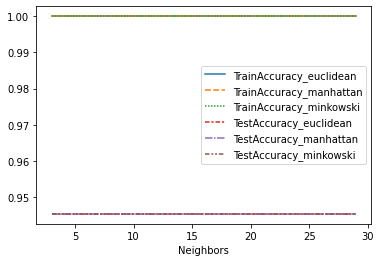

In [147]:
sns.lineplot(data=df_accuracy_metric_pivot)

In [148]:
#1. 모델 생성(4) - metric 지정
metric = 'euclidean'

## 그래프를 살펴보면 어떤 가중치를 사용하든 대체로 비슷하게 나오는 것을 확인할 수 있다. 해당 과제에서는 metric을 euclidean으로 사용해본다.

In [151]:
#2. 최종 모델 선정

knn_final = KNeighborsClassifier(n_neighbors=4, weights = 'uniform',metric = 'euclidean')
knn_final.fit(df_scaled_train_x, df_train_y)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [152]:
#3. 최종 모델 평가

y_pred = knn_final.predict(df_scaled_test_x)
print("Accuracy on training set: {:.3f}".format(knn_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(knn_final.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.979
Accuracy on test set: 0.938
Confusion matrix: 
[[91  6]
 [ 2 29]]
              precision    recall  f1-score   support

           0      0.978     0.938     0.958        97
           1      0.829     0.935     0.879        31

    accuracy                          0.938       128
   macro avg      0.904     0.937     0.918       128
weighted avg      0.942     0.938     0.939       128



## 결론: kNN 모델의 accuracy는 약 93.8%이다. diagnosis가 음성인 경우, precision과 f1-score의 값의 큰 차이가 없으며 f1-score도 1에 가깝다고 볼 수 있다. 하지만 diagnosis가 양성인 경우 f1-score의 값이 1에 가깝다고 보기는 어렵다. 따라서 유방암을 진단하는 데 있어 정확한 모델이라고 보기는 아쉬운 점이 있는 것 같다.

## 결과적으로 SVM, 인공 신경망, kNN을 비교해서 보면 인공 신경망 모델이 해당 유방암 데이터 셋에서 가장 좋은 성능을 보인다고 볼 수 있다.